Imports

In [ ]:
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import model_selection as cv
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from statsmodels.stats.proportion import proportion_confint
import sklearn.neighbors as nb

from google.colab import files
from google.colab import drive

Upload dataset

In [ ]:
uploaded = files.upload()

Saving cancerpatientdatasets.csv to cancerpatientdatasets.csv


In [ ]:
df = pd.read_csv('/content/cancerpatientdatasets.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


Preprocess

In [ ]:
df = df.drop('index', axis=1)
df = df.drop('Patient Id', axis=1)
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
X=df.drop(['Level'], axis=1)
y=df['Level']
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size = .2, random_state = 1)

Train Naive Bayes to compare results

In [ ]:
clf = GaussianNB()
prediction = clf.fit(X_train, y_train).predict(X_test)

print(confusion_matrix(y_test, prediction))
print(f"\nAccuracy: {accuracy_score(y_test, prediction)}")

print(classification_report(y_test, prediction))

epsilon = accuracy_score(y_test, prediction)
print(epsilon)

[[75  0  1]
 [ 0 57  5]
 [ 7  0 55]]

Accuracy: 0.935
              precision    recall  f1-score   support

        High       0.91      0.99      0.95        76
         Low       1.00      0.92      0.96        62
      Medium       0.90      0.89      0.89        62

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200

0.935


Train and Print A Decision Tree

In [ ]:
clf = DecisionTreeClassifier(criterion = "entropy")
clf = clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, prediction))
print(f"\nAccuracy: {accuracy_score(y_test, prediction)}\n")
print(classification_report(y_test, prediction))
epsilon = accuracy_score(y_test, prediction)

1.0
[[76  0  0]
 [ 0 62  0]
 [ 0  0 62]]

Accuracy: 1.0

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        76
         Low       1.00      1.00      1.00        62
      Medium       1.00      1.00      1.00        62

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



1.0
[[76  0  0]
 [ 0 62  0]
 [ 0  0 62]]

Accuracy: 1.0

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        76
         Low       1.00      1.00      1.00        62
      Medium       1.00      1.00      1.00        62

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



<Figure size 640x480 with 0 Axes>

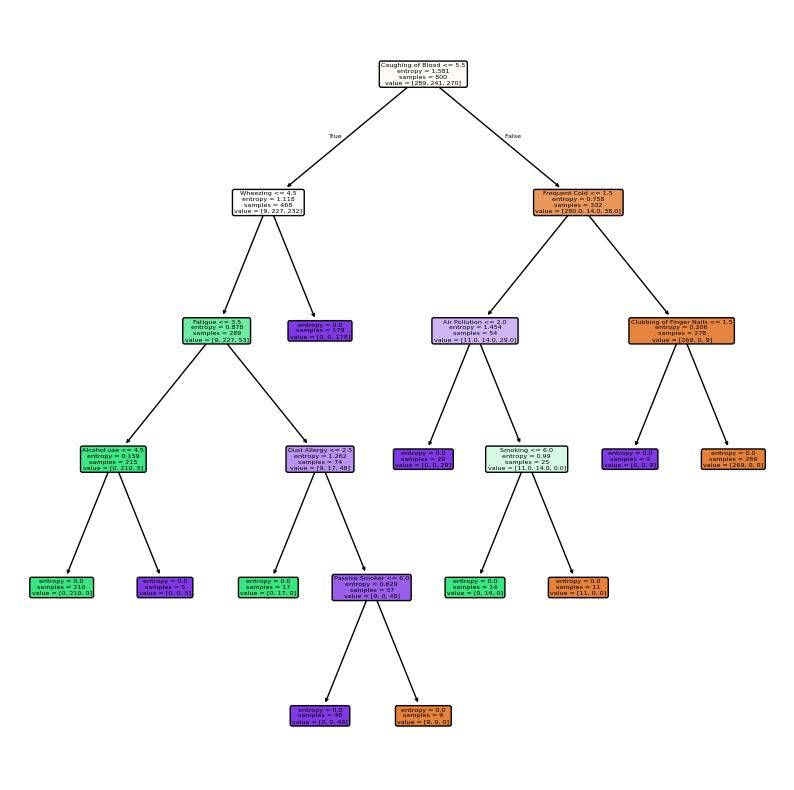

In [ ]:
clf = DecisionTreeClassifier(
    criterion = "entropy",
    min_samples_split = 4,
    min_impurity_decrease = 0.02
)
clf = clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, prediction))
print(f"\nAccuracy: {accuracy_score(y_test, prediction)}\n")
print(classification_report(y_test, prediction))
epsilon = accuracy_score(y_test, prediction)

fig = plt.gcf()
plt.figure(figsize=(10,10))
plot_tree(clf, filled=True, rounded=True,feature_names=list(X.columns.values))
plt.show()

Find hyperparameters

In [20]:
from sklearn.model_selection import GridSearchCV

params = {
    "min_impurity_decrease": list(np.linspace(0.05,0.5,5)),
    "min_samples_split":list(range(10,20,5))
}
clf = GridSearchCV(
    DecisionTreeClassifier(criterion = "entropy"),
    param_grid = params,
    cv = 10,
    n_jobs = -1
)
clf.fit(X_train, y_train)
print(f"Best Params = {clf.best_params_}  -  Accuracy = {clf.best_score_}")

Best Params = {'min_impurity_decrease': 0.05, 'min_samples_split': 10}  -  Accuracy = 0.9862499999999998


Print tree using hyperparameters

0.93
[[67  8  1]
 [ 0 62  0]
 [ 0  5 57]]

Accuracy: 0.93

              precision    recall  f1-score   support

        High       1.00      0.88      0.94        76
         Low       0.83      1.00      0.91        62
      Medium       0.98      0.92      0.95        62

    accuracy                           0.93       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.93      0.93       200

0.93


<Figure size 640x480 with 0 Axes>

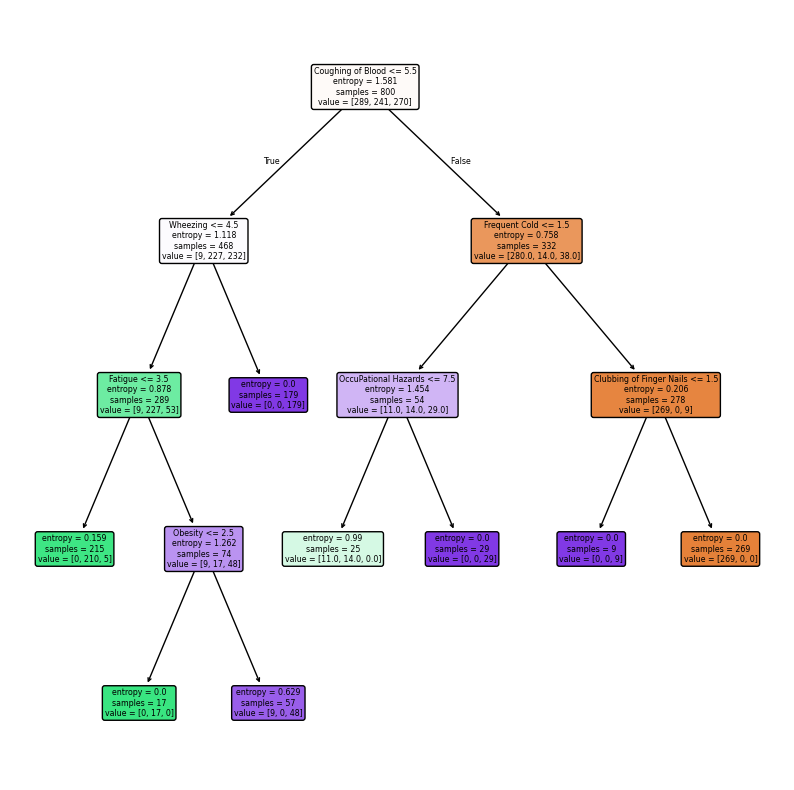

In [21]:
cdt= DecisionTreeClassifier(
    criterion = "entropy",
    min_samples_split = clf.best_params_["min_samples_split"],
    min_impurity_decrease = clf.best_params_["min_impurity_decrease"]
)
clf = cdt.fit(X_train, y_train)
pred = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
#print(f"prediction: {[pred]}")
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print(f"\nAccuracy: {accuracy_score(y_test, pred)}\n")
print(classification_report(y_test, pred))

epsilon = accuracy_score(y_test, pred)
print(epsilon)

fig = plt.gcf()
plt.figure(figsize=(10, 10))
plot_tree(clf, filled=True, rounded=True,feature_names=list(X.columns.values))
fig.savefig("tree.png")
plt.show()

Make an easy to interpret tree

<Figure size 640x480 with 0 Axes>

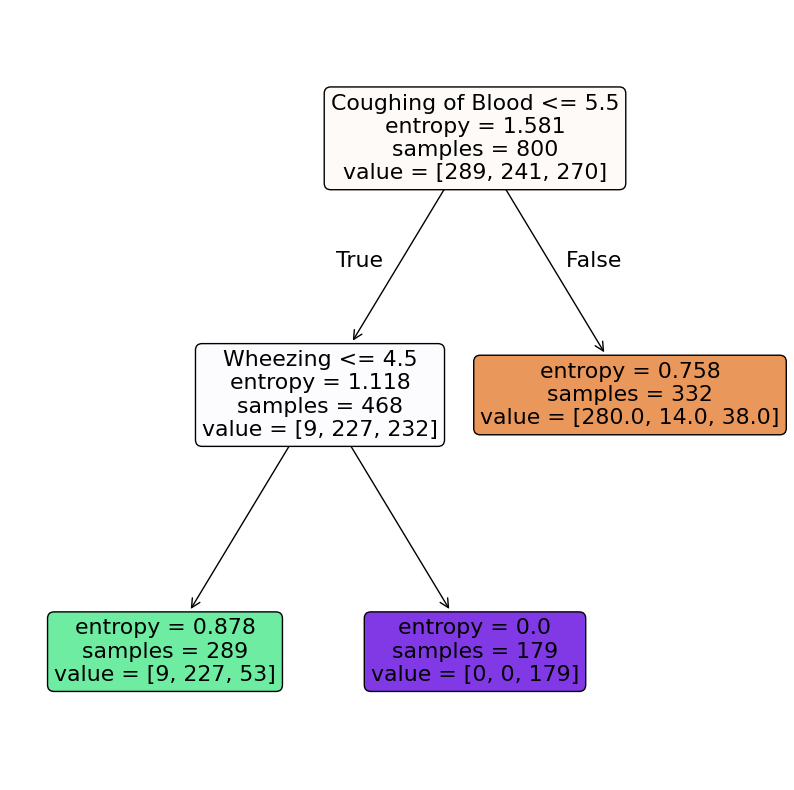

In [ ]:
# Just an "easy to interpret" example
epsilon = accuracy_score(y_test, prediction)
clf = DecisionTreeClassifier(
    criterion="entropy",
    min_samples_split=10,
    min_impurity_decrease=0.25  # We have changed this parameter from the previous example
)
clf = clf.fit(X_train, y_train)

fig = plt.gcf()
plt.figure(figsize=(10, 10))
plot_tree(clf, filled=True, rounded=True,feature_names=list(X.columns.values))
fig.savefig("tree.png")
plt.show()